In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/water.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
Unnamed: 0    61 non-null int64
location      61 non-null object
town          61 non-null object
mortality     61 non-null int64
hardness      61 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


In [3]:
df.pop('Unnamed: 0')

0      1
1      2
2      3
3      4
4      5
      ..
56    57
57    58
58    59
59    60
60    61
Name: Unnamed: 0, Length: 61, dtype: int64

In [4]:
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


Задание 1. Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

In [5]:
def count_everything(df):
    
#     Построить точечный график
    sns.regplot(data=df, x='hardness', y='mortality', color='green')
    print('Точечный график:')
    plt.show()
    
#     коэффициент Пирсона
    print('Коэффициент Пирсона:\n', df[['hardness', 'mortality']].corr(), ':\n')
    
#     коэффициент Спирмена
    print('Коэффициент Спирмена:\n', df[['hardness', 'mortality']].corr(method='spearman'), ':\n')

#     модель линейной регрессии
    x = df[['hardness']]
    y = df['mortality']
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    y_pred
    plt.scatter(x_test, y_test)
    plt.plot(x_test, y_pred, c='r')
    print('График предсказаний по модели регрессии:')
    plt.show()
    
#      коэффициент детерминации
    print('Коэффициент детерминации:', model.score(x_test, y_test))
    
#      график остатков
    residuals = y_test-y_pred
    plt.scatter(residuals, y_pred)
    print('График остатков:')
    plt.show()

Точечный график:


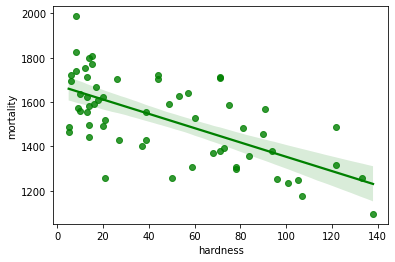

Коэффициент Пирсона:
            hardness  mortality
hardness   1.000000  -0.654849
mortality -0.654849   1.000000 :

Коэффициент Спирмена:
            hardness  mortality
hardness   1.000000  -0.631665
mortality -0.631665   1.000000 :

График предсказаний по модели регрессии:


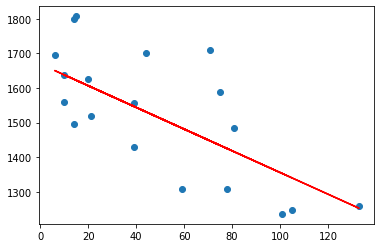

Коэффициент детерминации: 0.5046490611017092
График остатков:


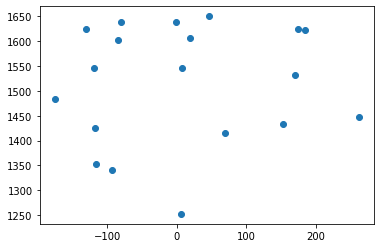

In [6]:
count_everything(df)

In [83]:
# Вывод: есть умеренная зависимость, она обратнопропорциональна.
#         То есть чем ниже жесткость, тем выше смертность.

Задание 2. Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [7]:
# Разделить данные на 2 группы. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности.

df_south = df[(df['location'] == 'South')]
df_north = df[(df['location'] == 'North')]

Точечный график:


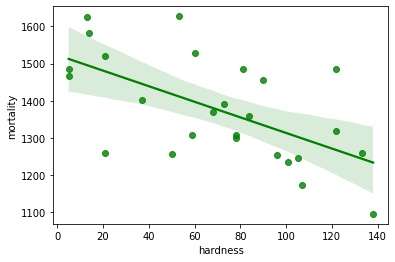

Коэффициент Пирсона:
            hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000 :

Коэффициент Спирмена:
            hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000 :

График предсказаний по модели регрессии:


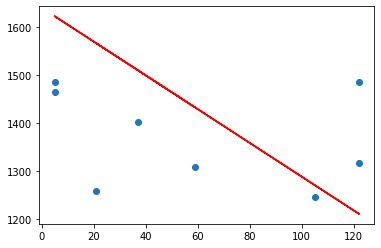

Коэффициент детерминации: -2.5519223012352077
График остатков:


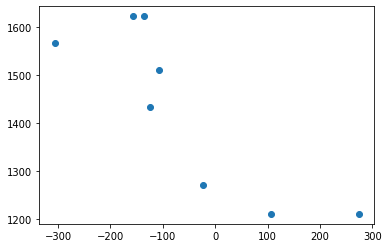

In [8]:
count_everything(df_south)

Точечный график:


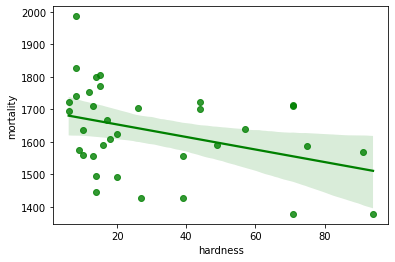

Коэффициент Пирсона:
            hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000 :

Коэффициент Спирмена:
            hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000 :

График предсказаний по модели регрессии:


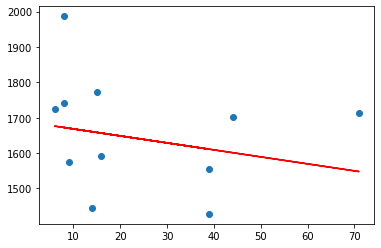

Коэффициент детерминации: 0.018885304285745863
График остатков:


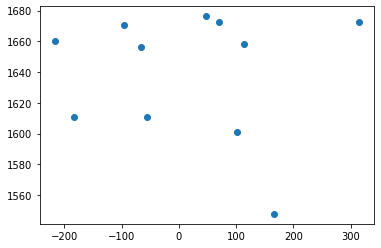

In [9]:
count_everything(df_north)

In [ ]:
# Вывод: зависимость в больше степени сохраняется для южных регионов.